In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [15]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [17]:

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\DELL\AppData\Local\Temp\ipykernel_9328\3013624488.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:\

In [23]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 9.  , 34.  , 27.  , 11.  , 28.  , 40.  , 18.  ,  0.75, 36.5 ,
       18.  , 32.  , 28.  , 25.  , 30.  , 18.  , 40.  , 18.  , 54.  ,
       51.  , 33.  , 46.  , 45.  , 18.  , 22.  , 33.  , 17.  , 30.  ,
       54.  , 36.  , 27.  , 51.  , 28.  , 35.  , 56.  , 30.  , 51.  ,
       23.  , 54.  ,  7.  , 36.  , 21.  , 22.  , 24.  , 18.  , 39.  ,
       22.  , 51.  , 33.  , 19.  , 44.  , 40.5 , 35.  , 28.  , 38.  ,
       14.5 , 47.  , 43.  ,  3.  , 16.  , 45.  , 23.  , 32.  , 22.  ,
       32.  , 37.  , 54.  , 31.  ,  2.  , 58.  , 21.  , 20.  , 21.  ,
        0.67, 20.  , 26.  , 24.  , 29.  , 23.  , 51.  , 32.  , 18.  ,
       26.  , 45.5 , 30.  , 58.  , 24.  , 27.  ,  6.  , 37.  , 19.  ,
       47.  , 50.  , 25.  , 17.  , 44.  , 28.  ,  3.  ,  5.  , 70.  ,
       70.5 , 24.  ,  0.42, 25.  , 19.  , 21.  ,  4.  , 30.  ,  3.  ,
       28.  ,  2.  , 53.  , 52.  , 32.5 , 62.  , 39.  , 36.  , 19.  ,
       15.  , 20.  , 28.  , 22.  , 54.  , 22.  , 42.  , 31.  , 47.  ,
        9.  ,  8.  ,

In [25]:
X_train['Age'].isnull().sum()

140

In [27]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,58.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_9328\3566835789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original', hist=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9328\3566835789.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Ag

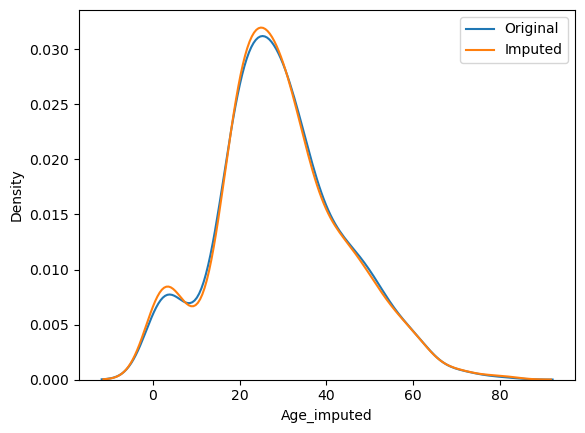

In [33]:
sns.distplot(X_train['Age'],label='Original', hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed', hist=False)

plt.legend()
plt.show()

In [35]:
print('Original variable variance', X_train['Age'].var())
print('After random variable imputation', X_train['Age_imputed'].var())

Original variable variance 210.2517072477438
After random variable imputation 215.05522397872895


In [37]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,57.312912
Age,71.580633,210.251707,210.251707
Age_imputed,57.312912,210.251707,215.055224


<Axes: >

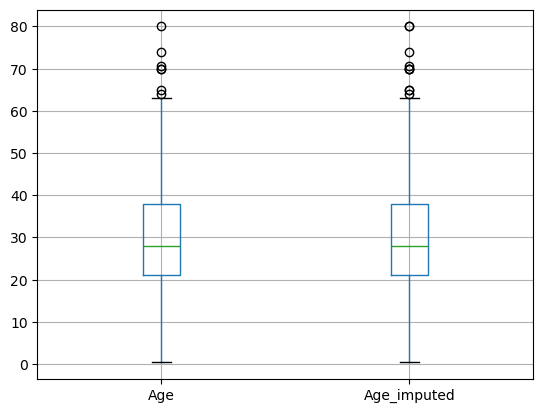

In [39]:
X_train[['Age', 'Age_imputed']].boxplot()

In [43]:

sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

In [51]:
data = pd.read_csv('train.csv',usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [53]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [55]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [57]:
X = data
y = data['SalePrice']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [67]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_train['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [69]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
827,TA,TA,189000,NaN,TA
973,NaN,TA,182000,NaN,NaN
77,NaN,TA,127000,NaN,NaN
981,TA,TA,336000,NaN,TA
307,NaN,NaN,89500,NaN,NaN


In [71]:

X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\DELL\AppData\Local\Temp\ipykernel_9328\3163770356.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'

ValueError: cannot assign mismatch length to masked array